# Lab 2: Supervised Learning - Solutions

In [1]:
import numpy as np
import pandas as pd

import math
from random import shuffle
import random
random.seed(0)

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

givenDec = lambda gdVal: float('%.1f' % gdVal) # 1 digit
givenDec3 = lambda gdVal: float('%.3f' % gdVal) # 3 digit

### Classification

In [2]:
def generateCarTypeData(gnPoints):

    #gnPoints = 20

    engine_power_all = []
    price_all = []
    famCar_class = []

    for i in range(gnPoints):
        rnd_val = np.random.random()
        rnd_val_e = np.random.random()
        rnd_val_p = np.random.random()
        if(rnd_val < 0.5):
            famCar_class.append(0)
            tmp_eng_power = np.random.randint(low=50, high=240)
            tmp_price = np.random.randint(low=10, high=100)

            while (120<tmp_eng_power<180 and 25<tmp_price<50):
                tmp_eng_power = np.random.randint(low=50, high=240)
                tmp_price = np.random.randint(low=10, high=100)

            engine_power_all.append(tmp_eng_power)
            price_all.append(tmp_price)
        else:
            famCar_class.append(1)
            engine_power_all.append(np.random.randint(low=120, high=180))
            price_all.append(np.random.randint(low=25, high=50))

    tmp_df = pd.DataFrame({
        "e":engine_power_all,
        "p":price_all,
        "c":famCar_class
    })
    
    return tmp_df


In [3]:
my_df = generateCarTypeData(gnPoints=40)
#my_df

<AxesSubplot:xlabel='e', ylabel='p'>

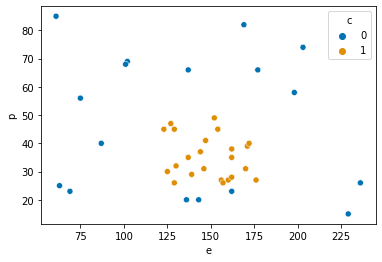

In [4]:
#plt.scatter(my_df.e, my_df.p, marker='o');
sns.scatterplot(x="e", y="p", hue="c", data=my_df, palette="colorblind")

In [5]:
# from 2D data, get the range values associated with a family car
def getRange_familyCar(gdf):
    min_price = gdf[gdf['c']==1]['p'].min()
    max_price = gdf[gdf['c']==1]['p'].max()
    min_engine = gdf[gdf['c']==1]['e'].min()
    max_engine = gdf[gdf['c']==1]['e'].max()
    
    return min_price, max_price, min_engine, max_engine
    

In [6]:
def getRange_familyCar_large(gdf):
    min_price = gdf[gdf['c']==1]['p'].min()
    max_price = gdf[gdf['c']==1]['p'].max()
    min_engine = gdf[gdf['c']==1]['e'].min()
    max_engine = gdf[gdf['c']==1]['e'].max()
    
    min_price_new = gdf[(gdf['c']==0) & (gdf['p'] < min_price)]['p'].max()
    max_price_new = gdf[(gdf['c']==0) & (gdf['p'] > max_price)]['p'].min()
    
    min_engine_new = gdf[(gdf['c']==0) & (gdf['e'] < min_engine)]['e'].max()
    max_engine_new = gdf[(gdf['c']==0) & (gdf['e'] > max_engine)]['e'].min()
    
    return min_price_new, max_price_new, min_engine_new, max_engine_new

In [7]:
def getRange_familyCar_medium(gdf):
    min_price = gdf[gdf['c']==1]['p'].min()
    max_price = gdf[gdf['c']==1]['p'].max()
    min_engine = gdf[gdf['c']==1]['e'].min()
    max_engine = gdf[gdf['c']==1]['e'].max()
    
    min_price_new = gdf[(gdf['c']==0) & (gdf['p'] < min_price)]['p'].max()
    max_price_new = gdf[(gdf['c']==0) & (gdf['p'] > max_price)]['p'].min()
    
    min_engine_new = gdf[(gdf['c']==0) & (gdf['e'] < min_engine)]['e'].max()
    max_engine_new = gdf[(gdf['c']==0) & (gdf['e'] > max_engine)]['e'].min()
    
    min_price_new = (min_price_new + min_price)/2
    max_price_new = (max_price_new + max_price)/2
    min_engine_new = (min_engine_new + min_engine)/2
    max_engine_new = (max_engine_new + max_engine)/2
    
    return min_price_new, max_price_new, min_engine_new, max_engine_new

In [8]:
min_p, max_p, min_e, max_e = getRange_familyCar(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

min_p, max_p, min_e, max_e = getRange_familyCar_large(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

min_p, max_p, min_e, max_e = getRange_familyCar_medium(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

rectangle 26 49 123 176
rectangle 25 56 102 177
rectangle 25.5 52.5 112.5 176.5


In [9]:
def classify_instance_byRectangle(min_price, max_price, min_engine, max_engine, gdf_instance):
    if(min_engine<gdf_instance.e<max_engine and min_price<gdf_instance.p<max_price):
        return 1
    else:
        return 0

In [10]:
def classify_instance_byCircle(min_price, max_price, min_engine, max_engine, gdf_instance):
    d_radius = min(max_price - min_price, max_engine-min_engine)/2.0
    v_center = [np.mean([min_price, max_price]), np.mean([min_engine, max_engine])]
    
    #print(d_radius)
    #print(v_center)
    
    if(math.sqrt(pow(gdf_instance.p - v_center[0], 2) + pow(gdf_instance.e - v_center[1], 2)) < d_radius):
        return 1
    else:
        return 0

In [11]:
print(my_df.iloc[0])
classify_instance_byCircle(25, 46, 120, 179, my_df.iloc[0])

e    102
p     69
c      0
Name: 0, dtype: int64


0

In [12]:
def classify_instance_byEllipsoid(min_price, max_price, min_engine, max_engine, gdf_instance):
    d_radius_x = (max_price - min_price)/2.0
    d_radius_y = (max_engine - min_engine)/2.0
    v_center = [np.mean([min_price, max_price]), np.mean([min_engine, max_engine])]
    
    #print(d_radius_x, d_radius_y)
    #print(v_center)
    
    if(pow(gdf_instance.p - v_center[0], 2)/pow(d_radius_x,2) + pow(gdf_instance.e - v_center[1], 2)/pow(d_radius_y,2) < 1.0):
        return 1
    else:
        return 0

In [13]:
print(my_df.iloc[0])
classify_instance_byEllipsoid(25, 46, 120, 179, my_df.iloc[0])

e    102
p     69
c      0
Name: 0, dtype: int64


0

In [14]:
test_df = generateCarTypeData(gnPoints=20)

In [16]:
min_p, max_p, min_e, max_e = getRange_familyCar(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byRectangle(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

rectangle 26 49 123 176
[1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0]
[1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0]
d_accuracy 0.95


In [17]:
min_p, max_p, min_e, max_e = getRange_familyCar_large(my_df)
print("rectangle_large",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byRectangle(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

rectangle_large 25 56 102 177
[1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0]
[1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0]
d_accuracy 1.0


In [18]:
min_p, max_p, min_e, max_e = getRange_familyCar_medium(my_df)
print("rectangle_large",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byRectangle(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

rectangle_large 25.5 52.5 112.5 176.5
[1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0]
[1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0]
d_accuracy 1.0


In [19]:
min_p, max_p, min_e, max_e = getRange_familyCar_medium(my_df)
print("rectangle_medium",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byCircle(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

rectangle_medium 25.5 52.5 112.5 176.5
[1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0]
[1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0]
d_accuracy 0.8


In [20]:
min_p, max_p, min_e, max_e = getRange_familyCar_medium(my_df)
print("rectangle_medium",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byEllipsoid(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

rectangle_medium 25.5 52.5 112.5 176.5
[1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0]
[1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0]
d_accuracy 1.0


### Regression

In [21]:
def getRMSE(gX, gr, gprVals):
    # report Root Mean Squared Error (RMSE) as output
    sum_squared_error=0
    N = len(X)
    for index, x in enumerate(gX):
        error = gprVals[index] - gr[index]
        squared_error = pow(error, 2)
        sum_squared_error += squared_error

    mean_squared_error = sum_squared_error/N
    tmp_RMSE = pow(mean_squared_error, 0.5)
    
    return tmp_RMSE

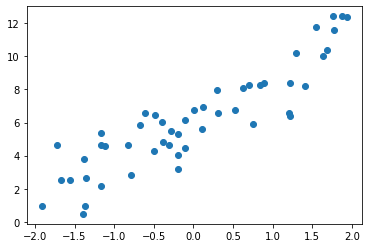

In [22]:
n_points = 50

b = 6 # intercept
m = 2.25 # slope
noise_mean = 0.0
noise_var = 1.21

X = []
r = []
for i in range(n_points):
    #rnd_num = random.random()
    rnd_num = np.random.uniform(-2, 2)
    X.append(rnd_num)
    r.append(b + m*rnd_num + np.random.normal(loc=noise_mean, scale=noise_var))

plt.scatter(X, r, marker='o');

In [23]:
#r = w_0 + w_1*x

# calculate w_1 and w_0 for the dataset
N=len(X)
mean_X = sum(X)/N
mean_r = sum(r)/N

w1_numerator = 0
for index, x in enumerate(X):
    w1_numerator += x * r[index]

w1_numerator -= (mean_X*mean_r*N)

w1_denominator = 0
for index, x in enumerate(X):
    w1_denominator += pow(x,2)

w1_denominator -= N*pow(mean_X,2)

w1 = w1_numerator/w1_denominator

w0 = mean_r - w1*mean_X

print('w1: %.5f' %w1)
print('w0: %.5f' %w0)

w1: 2.45146
w0: 6.16843


In [24]:
# Report the error with the calculated w_1 and w_0
predicted_vals_linear = [w1*x+w0 for x in X]
RMSE = getRMSE(X, r, predicted_vals_linear)
print('RMSE: %.5f' %RMSE)

RMSE: 1.31802


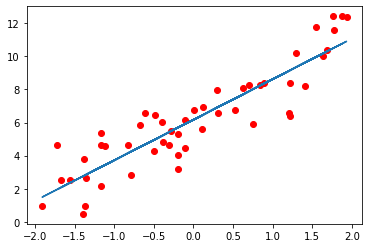

In [25]:
# Plot the data points along with the fitted line
plt.plot(X, r, 'ro')
plt.plot(X, [w1*x+w0 for x in X] )
plt.show()

Intercept: 
 [6.16842762]
Coefficients: 
 [[2.4514582]]
RMSE [1.31802052]


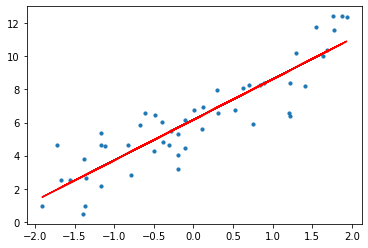

In [26]:
xx = np.array(X)
rr = np.array(r)

# transforming the data to include another axis
xx = xx[:, np.newaxis]
rr = rr[:, np.newaxis]

model = LinearRegression()
model.fit(xx, rr)
r_pred = model.predict(xx)

# The coefficients + Intercept
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

RMSE = getRMSE(xx, rr, r_pred)
print("RMSE",RMSE)

plt.scatter(xx, rr, s=10)
plt.plot(xx, r_pred, color='r')
plt.show()

In [27]:
import operator
from sklearn.preprocessing import PolynomialFeatures

def polyFit(gxx, grr, gnDegree):

    polynomial_features= PolynomialFeatures(degree=gnDegree)
    x_poly = polynomial_features.fit_transform(gxx)

    model = LinearRegression()
    model.fit(x_poly, grr)
    r_poly_pred = model.predict(x_poly)

    # The coefficients + Intercept
    print('Intercept: \n', model.intercept_)
    print('Coefficients: \n', model.coef_)
    
    RMSE = getRMSE(gxx, grr, r_poly_pred)
    print('RMSE',RMSE)

    plt.scatter(gxx, grr, s=10)

    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(gxx,r_poly_pred), key=sort_axis)
    gxx, r_poly_pred = zip(*sorted_zip)
    plt.plot(gxx, r_poly_pred, color='m')
    plt.show()
    
    return model.intercept_, model.coef_

Intercept: 
 [5.79464207]
Coefficients: 
 [[0.         2.39682686 0.30794003]]
RMSE [1.27077223]


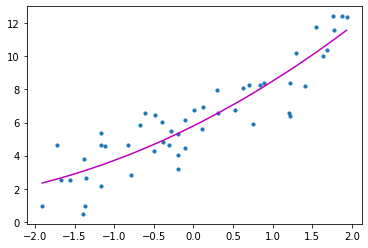

(array([5.79464207]), array([[0.        , 2.39682686, 0.30794003]]))

In [28]:
polyFit(xx, rr, gnDegree=2)

Intercept: 
 [5.77568427]
Coefficients: 
 [[0.         1.61186985 0.2669479  0.34356599]]
RMSE [1.21751009]


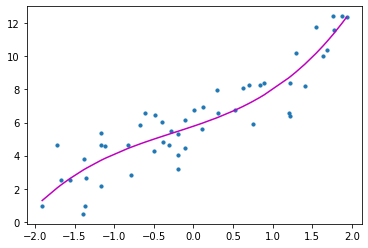

(array([5.77568427]),
 array([[0.        , 1.61186985, 0.2669479 , 0.34356599]]))

In [29]:
polyFit(xx, rr, gnDegree=3)

Intercept: 
 [5.97746469]
Coefficients: 
 [[ 0.          1.93501107 -0.25499443 -0.02444192  0.12945498  0.07880264
   0.01006571]]
RMSE [1.19764682]


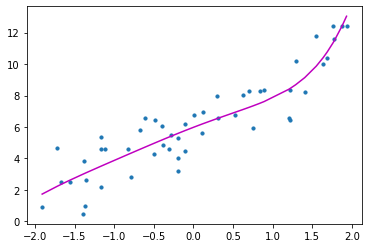

(array([5.97746469]),
 array([[ 0.        ,  1.93501107, -0.25499443, -0.02444192,  0.12945498,
          0.07880264,  0.01006571]]))

In [30]:
polyFit(xx, rr, gnDegree=6)

### Backups

In [31]:
my_df = pd.DataFrame({
    "e":[100, 80, 200, 250, 220, 150, 120, 170, 160, 180],
    "p":[20, 22, 60, 80, 70, 40, 30, 35, 45, 50],
    "c":[0,0,0,0,0,1,1,1,1,1]
})
my_df

,e,p,c
0,100,20,0
1,80,22,0
2,200,60,0
3,250,80,0
4,220,70,0
5,150,40,1
6,120,30,1
7,170,35,1
8,160,45,1
9,180,50,1


In [32]:
n_points = 40

# engine_power_c0 = list(np.random.randint(low=50, high=120, size=int(n_points/4))) + list(np.random.randint(low=180, high=250, size=int(n_points/4)))
# shuffle(engine_power_c0)
# engine_power_c1 = list(np.random.randint(low=120, high=180, size=int(n_points/2)))
# engine_power_all = engine_power_c0 + engine_power_c1
engine_power_all = list(np.random.randint(low=50, high=300, size=int(n_points)))

#price_c0 = list(np.random.randint(low=10, high=25, size=int(n_points/4))) + list(np.random.randint(low=50, high=100, size=int(n_points/4)))
#shuffle(price_c0)
#price_c1 = list(np.random.randint(low=25, high=50, size=int(n_points/2)))
#price_all = price_c0 + price_c1
price_all = list(np.random.randint(low=10, high=100, size=int(n_points)))

#famCar_class = list(np.array([0] * int(n_points/2), dtype='int32')) + list(np.array([1] * int(n_points/2), dtype='int32'))

famCar_class = []
for i in range(n_points):
    if(120 < engine_power_all[i] <180 and 25 < price_all[i] <50):
        famCar_class.append(1)
    else:
        famCar_class.append(0)

my_df = pd.DataFrame({
    "e":engine_power_all,
    "p":price_all,
    "c":famCar_class
})
my_df

,e,p,c
0,292,18,0
1,136,74,0
2,80,74,0
3,90,65,0
4,121,40,1
5,178,55,0
6,176,45,1
7,208,48,0
8,177,38,1
9,142,96,0
